<a href="https://colab.research.google.com/github/proyectoTFMUAH/ANN/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#chuleta

#https://www.datacamp.com/community/tutorials/deep-learning-python?utm_campaignid=282657555&utm_adgroupid=1147890695096458&utm_device=c&utm_keyword=keras&utm_matchtype=p&utm_network=o&utm_adpostion=&utm_creative=&utm_targetid=kwd-71743615746804:loc-170&utm_loc_interest_ms=&utm_loc_physical_ms=3203&msclkid=38ccf3d9b04f1045ba9093f9f9c73036&utm_source=bing&utm_medium=cpc&utm_campaign=NEW%20Granular%20Topics%20(via%20DSA%20insights)%20%7C%20Tier%201%20BING&utm_term=keras&utm_content=community%2Ftutorials%2Fdeep-learning-python


#Cargamos la libreria

import tensorflow as tf

import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

#Cargamos el Dataset
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()



Saving DSEuropea.csv to DSEuropea (1).csv


In [6]:
# https://www.tensorflow.org/tutorials/load_data/csv

Pricing_train = pd.read_csv('DSEuropea.csv')

Pricing_train.head()

,Unnamed: 0,vSt,vK,vTmat,vvol,vr,Unnamed: 6
0,1,19.019752,85.864971,53.803172,0.464357,0.057253,18.307547
1,2,69.475322,25.618889,80.115425,0.511415,0.094931,69.469906
2,3,64.124547,30.302197,9.591628,0.078536,0.070882,48.770954
3,4,76.219773,28.674030,7.460327,0.046091,0.054959,57.190492
4,5,60.074539,78.835511,12.979597,0.096357,0.015567,6.578845


In [7]:
#La tarea nominal de este conjunto de datos es predecir el precio, así que separe las características y etiquetas para el entrenamiento:
Pricing_train_features = Pricing_train.copy()
Pricing_train_results = Pricing_train_features.pop('Unnamed: 6')
Pricing_indices = Pricing_train_features.pop('Unnamed: 0')

# Empaque las funciones en una sola matriz NumPy .:

Pricing_train_features = np.array(Pricing_train_features)
Pricing_train_features

print(Pricing_train_features.shape)


(10000, 5)


Epoch 1/1500
313/313 [==============================] - 1s 1ms/step - loss: 1383.5898 - accuracy: 0.0000e+00
Epoch 2/1500
313/313 [==============================] - 0s 1ms/step - loss: 87.1125 - accuracy: 0.0000e+00
Epoch 3/1500
313/313 [==============================] - 0s 1ms/step - loss: 61.4594 - accuracy: 1.2459e-05
Epoch 4/1500
313/313 [==============================] - 0s 1ms/step - loss: 53.3505 - accuracy: 6.8198e-05
Epoch 5/1500
313/313 [==============================] - 0s 1ms/step - loss: 52.2217 - accuracy: 1.3080e-04
Epoch 6/1500
313/313 [==============================] - 0s 1ms/step - loss: 45.9149 - accuracy: 1.3152e-04
Epoch 7/1500
313/313 [==============================] - 0s 1ms/step - loss: 44.2099 - accuracy: 3.5427e-04
Epoch 8/1500
313/313 [==============================] - 0s 1ms/step - loss: 40.7309 - accuracy: 2.7271e-04
Epoch 9/1500
313/313 [==============================] - 0s 1ms/step - loss: 40.2696 - accuracy: 2.5947e-04
Epoch 10/1500
313/313 [============

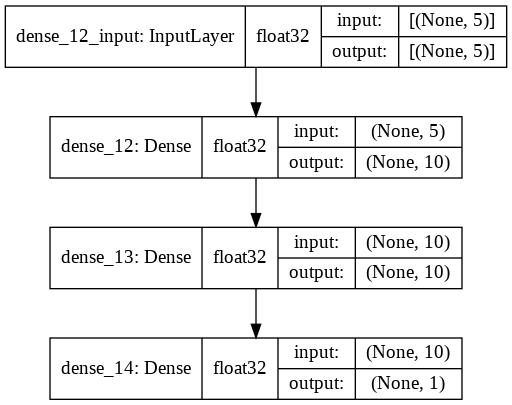

In [28]:

#Sequential

#https://keras.io/guides/sequential_model/
from tensorflow import keras


#define el modelo
modelEuropeanoption = tf.keras.Sequential([
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(1)
])
#compilar modelo
modelEuropeanoption.compile(loss = tf.losses.MeanSquaredError(),
                              metrics=['accuracy'],
                      optimizer = tf.optimizers.Adam())

# entrernar el modelo

modelEuropeanoption.fit(Pricing_train_features, Pricing_train_results, epochs=1500)

modelEuropeanoption.summary()

len(modelEuropeanoption.weights)

keras.utils.plot_model(modelEuropeanoption, show_shapes=True,show_dtype=True)



In [29]:
#SAlvar el modleo y predicifr

#https://www.machinecurve.com/index.php/2020/02/14/how-to-save-and-load-a-model-with-keras/#predictions-for-new-data

#https://victorzhou.com/blog/keras-cnn-tutorial/


prediction = modelEuropeanoption.predict(Pricing_train_features)


# show the inputs and predicted outputs
for i in range(len(Pricing_train_features)):
	print("X=%s, Predicted=%s" % (Pricing_train_features[i], prediction[i]))





Se han truncado las últimas 5000 líneas del flujo de salida.
X=[85.294 49.557 22.161  0.377  0.053], Predicted=[76.853]
X=[64.005 54.583 67.021  0.582  0.072], Predicted=[63.147]
X=[23.488 79.041 65.953  0.294  0.074], Predicted=[22.722]
X=[18.942 97.603 17.728  0.763  0.045], Predicted=[14.404]
X=[ 25.112  77.944 114.835   0.194   0.029], Predicted=[23.813]
X=[73.682 75.102 58.674  0.585  0.007], Predicted=[72.614]
X=[  3.646  21.016 110.926   0.383   0.008], Predicted=[2.827]
X=[37.922 92.505 41.74   0.108  0.022], Predicted=[11.335]
X=[89.192 35.565 70.262  0.069  0.048], Predicted=[88.417]
X=[52.53  53.209 23.191  0.639  0.008], Predicted=[46.356]
X=[85.136 11.9   13.984  0.313  0.099], Predicted=[79.28]
X=[96.381 50.04  58.354  0.02   0.042], Predicted=[91.662]
X=[ 6.567 23.681 23.158  0.711  0.059], Predicted=[6.069]
X=[23.921  4.113 20.601  0.686  0.079], Predicted=[22.976]
X=[56.014 72.754 45.954  0.574  0.002], Predicted=[53.692]
X=[12.959  1.593 25.546  0.458  0.076], Predict

In [41]:

#Calculamos el error de los datos del training
Pricing_train_results.head()

MSEi=0
for i in range(len(Pricing_train_results)):
  MSEi=MSEi+(prediction[i]-Pricing_train_results[i])**2
MSE=MSEi/len(Pricing_train_results)
print(MSE)            

MDi=0
for i in range(len(Pricing_train_results)):
  MDi=MDi+(prediction[i]-Pricing_train_results[i])
MD=MDi/len(Pricing_train_results)
print(MD)            

MADi=0
for i in range(len(Pricing_train_results)):
  MADi=MADi+abs ((prediction[i]-Pricing_train_results[i]))
MAD=MADi/len(Pricing_train_results)
print(MAD)   

#MAPEi=0
#tmuestra=len(Pricing_train_results)
#for i in range(len(Pricing_train_results)):
 #   if Pricing_train_results[i] > 0:
  #    MAPEi=MAPEi+abs ((prediction[i]-Pricing_train_results[i]))/Pricing_train_results[i]
 #   else:
 #     tmuestra=tmuestra-1  
#MAPEi=MAPEi/tmuestra
#print(MAPEi)   


from sklearn.metrics import r2_score 
R_square = r2_score(prediction,Pricing_train_results) 
print('Coefficient of Determination', R_square) 


[3.037]
[0.11]
[0.905]
Coefficient of Determination 0.9963590958929832
